# Arboles de decisión

### Andrés Nieto Guadarrama

In [3]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from tqdm.notebook import tqdm
from time import sleep
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate

In [36]:
dataset=make_moons(n_samples=10_000, noise=0.4, random_state=25)
#¿Qué tienen los datos?
print(dataset[0][0:3])
print(dataset[1])
len(dataset[0])

[[-0.09821478  0.39829029]
 [-0.37972495  0.53213178]
 [ 1.3341397   0.23372859]]
[0 0 1 ... 0 1 1]


10000

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest = train_test_split(dataset[0], test_size=0.2, random_state=314)
ytrain, ytest = train_test_split(dataset[1], test_size=0.2, random_state=314)

### Un primer modelo:

In [45]:
pipe = Pipeline([   
    ("tree", DecisionTreeClassifier(max_depth=5, random_state=314))   
])
pipe.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=5,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=314,
                                        splitter='best'))],
         verbose=False)

In [48]:
cross_validate(pipe, xtest , ytest, cv=5, scoring=["precision", "recall"])

{'fit_time': array([0.00199461, 0.00099754, 0.00202918, 0.00199056, 0.00196314]),
 'score_time': array([0.00200605, 0.00199556, 0.00099921, 0.00099683, 0.00103712]),
 'test_precision': array([0.81220657, 0.89528796, 0.87765957, 0.86432161, 0.83902439]),
 'test_recall': array([0.86069652, 0.85074627, 0.82089552, 0.85572139, 0.86      ])}

### Cambiemos algunos hiperparámetros y veamos qué ocurre:

In [50]:
#Usando criterio de entropía en vez de Gini:

pipe = Pipeline([   
    ("tree", DecisionTreeClassifier(max_depth=5, random_state=314,criterion="entropy"))   
])
pipe.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=5,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=314,
                                        splitter='best'))],
         verbose=False)

In [51]:
cross_validate(pipe, xtest , ytest, cv=5, scoring=["precision", "recall"])

{'fit_time': array([0.00199461, 0.0019424 , 0.00398922, 0.00293899, 0.00204301]),
 'score_time': array([0.00204682, 0.0019958 , 0.00105   , 0.0009973 , 0.00199914]),
 'test_precision': array([0.88172043, 0.87244898, 0.88505747, 0.8680203 , 0.82464455]),
 'test_recall': array([0.8159204 , 0.85074627, 0.76616915, 0.85074627, 0.87      ])}

### Cambiando la profundidad del árbol

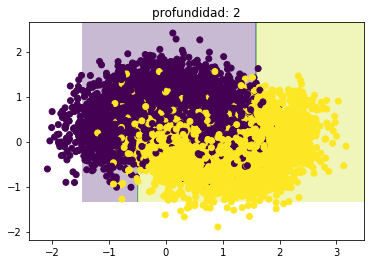

{'fit_time': array([0.0009954 , 0.0009973 , 0.0009973 , 0.0009954 , 0.00103188]),
 'score_time': array([0.00098968, 0.00099778, 0.00103354, 0.00096297, 0.00099659]),
 'test_precision': array([0.88020833, 0.86868687, 0.87368421, 0.86868687, 0.87222222]),
 'test_recall': array([0.84079602, 0.85572139, 0.82587065, 0.85572139, 0.785     ])}

In [68]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_clf.fit(xtrain, ytrain)

x1min, x2min = xtrain.min(axis=0) * 0.7
x1max, x2max = xtrain.max(axis=0) * 1.1

x1map, x2map = np.mgrid[x1min:x1max:0.01, x2min:x2max:0.01]
xpred = np.c_[x1map.reshape(-1,1), x2map.reshape(-1,1)]
ypred = tree_clf.predict(xpred).reshape(x1map.shape)

plt.contourf(x1map, x2map, ypred, alpha=0.3)
plt.scatter(*xtrain.T, c=ytrain)
plt.title(f"profundidad: {max_depth}")

plt.show()

cross_validate(tree_clf, xtest , ytest, cv=5, scoring=["precision", "recall"])

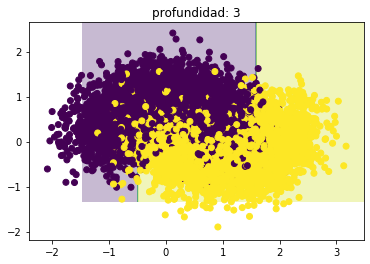

{'fit_time': array([0.0009973 , 0.00099754, 0.0009973 , 0.00099754, 0.00099754]),
 'score_time': array([0.00199461, 0.00099707, 0.00099754, 0.00099707, 0.00099707]),
 'test_precision': array([0.87564767, 0.86868687, 0.87368421, 0.86868687, 0.87222222]),
 'test_recall': array([0.84079602, 0.85572139, 0.82587065, 0.85572139, 0.785     ])}

In [69]:
max_depth = 3
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_clf.fit(xtrain, ytrain)

x1min, x2min = xtrain.min(axis=0) * 0.7
x1max, x2max = xtrain.max(axis=0) * 1.1

x1map, x2map = np.mgrid[x1min:x1max:0.01, x2min:x2max:0.01]
xpred = np.c_[x1map.reshape(-1,1), x2map.reshape(-1,1)]
ypred = tree_clf.predict(xpred).reshape(x1map.shape)

plt.contourf(x1map, x2map, ypred, alpha=0.3)
plt.scatter(*xtrain.T, c=ytrain)
plt.title(f"profundidad: {max_depth}")

plt.show()

cross_validate(tree_clf, xtest , ytest, cv=5, scoring=["precision", "recall"])

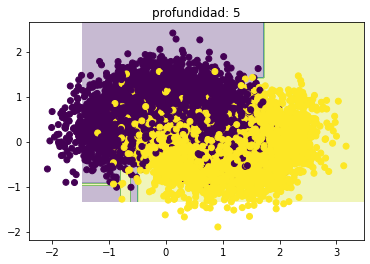

{'fit_time': array([0.00099683, 0.00099683, 0.00103164, 0.00199318, 0.0009973 ]),
 'score_time': array([0.00099921, 0.00199509, 0.00196123, 0.00099778, 0.00199509]),
 'test_precision': array([0.81220657, 0.89528796, 0.87765957, 0.86432161, 0.83902439]),
 'test_recall': array([0.86069652, 0.85074627, 0.82089552, 0.85572139, 0.86      ])}

In [70]:
max_depth = 5
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_clf.fit(xtrain, ytrain)

x1min, x2min = xtrain.min(axis=0) * 0.7
x1max, x2max = xtrain.max(axis=0) * 1.1

x1map, x2map = np.mgrid[x1min:x1max:0.01, x2min:x2max:0.01]
xpred = np.c_[x1map.reshape(-1,1), x2map.reshape(-1,1)]
ypred = tree_clf.predict(xpred).reshape(x1map.shape)

plt.contourf(x1map, x2map, ypred, alpha=0.3)
plt.scatter(*xtrain.T, c=ytrain)
plt.title(f"profundidad: {max_depth}")

plt.show()

cross_validate(tree_clf, xtest , ytest, cv=5, scoring=["precision", "recall"])

### Conclusiones:

1. Estimar un modelo de árbol de decisión usando como criterio la función de entropía en vez del coeficiente de Gini causa un aumento en la precisión y una caída en recall. Esto es, reduce el número de falsos positivos.

2. Un incremento en la profundidad del árbol reduce la precisión debido a que incrementa el número de falsos positivos.